# Regional wind distribution

## Imports

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

import pylab as plt
plt.rcParams['figure.figsize'] = (14, 6)

import datetime
import numpy as np
import netCDF4

## Small test

[[-180.         -116.56505118  -90.        ]
 [  45.          113.96248897    5.71059314]
 [  -5.19442891   92.86240523 -135.        ]]


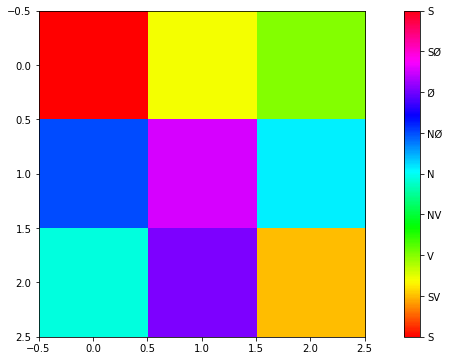

In [2]:
wind_dir = np.degrees(np.arctan2(-np.array([[0, 20, 10], [-5, -18, -1], [1, -20, 3]], dtype="float"), -np.array([[10, 10, 0], [-5, 8, -10], [-11, 1, 3]], dtype="float")))
print(wind_dir)
plt.imshow(wind_dir, cmap=plt.cm.hsv, vmin=-180, vmax=180)
cbar = plt.colorbar()
cbar.set_ticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])
cbar.set_ticklabels(['S', 'SV', 'V', 'NV', 'N', 'NØ', 'Ø', 'SØ', 'S'])

## Define classifier

In [3]:
def classify_wind(wind_speed_f, wind_dir_f):
    
    # Seperate by wind direction
    N = wind_speed_f[np.where((wind_dir_f>-22.5) & (wind_dir_f<=22.5))]

    NE = wind_speed_f[np.where((wind_dir_f>22.5) & (wind_dir_f<=67.5))]

    E = wind_speed_f[np.where((wind_dir_f>67.5) & (wind_dir_f<=112.5))]

    SE = wind_speed_f[np.where((wind_dir_f>112.5) & (wind_dir_f<=167.5))]

    S = wind_speed_f[np.where((wind_dir_f>167.5) & (wind_dir_f<=180.0) | (wind_dir_f>-167.5) & (wind_dir_f<=-180.0))]

    SW = wind_speed_f[np.where((wind_dir_f>-167.5) & (wind_dir_f<=-112.5))]

    W = wind_speed_f[np.where((wind_dir_f>-112.5) & (wind_dir_f<=-67.5))]

    NW = wind_speed_f[np.where((wind_dir_f>-67.5) & (wind_dir_f<=-22.5))]
    
    
    # Seperate by wind speed
    gentle_breeze = 5.5
    strong_breeze = 13.8
    gale = 20.7
    storm = 32.6

    N_gentle_breeze = len(N[np.where(N<gentle_breeze)]) / len_wind * 100
    N_strong_breeze = len(N[np.where((N>=gentle_breeze) & (N<strong_breeze))]) / len_wind * 100
    N_gale = len(N[np.where((N>=strong_breeze) & (N<gale))]) / len_wind * 100
    N_storm = len(N[np.where((N>=gale) & (N<storm))]) / len_wind * 100
    N_hurricane = len(N[np.where((N>=storm))]) / len_wind * 100

    NE_gentle_breeze = len(NE[np.where(NE<gentle_breeze)]) / len_wind * 100
    NE_strong_breeze = len(NE[np.where((NE>=gentle_breeze) & (NE<strong_breeze))]) / len_wind * 100
    NE_gale = len(NE[np.where((NE>=strong_breeze) & (NE<gale))]) / len_wind * 100
    NE_storm = len(NE[np.where((NE>=gale) & (NE<storm))]) / len_wind * 100
    NE_hurricane = len(NE[np.where((NE>=storm))]) / len_wind * 100

    E_gentle_breeze = len(E[np.where(E<gentle_breeze)]) / len_wind * 100
    E_strong_breeze = len(E[np.where((E>=gentle_breeze) & (E<strong_breeze))]) / len_wind * 100
    E_gale = len(E[np.where((E>=strong_breeze) & (E<gale))]) / len_wind * 100
    E_storm = len(E[np.where((E>=gale) & (E<storm))]) / len_wind * 100
    E_hurricane = len(E[np.where((E>=storm))]) / len_wind * 100

    SE_gentle_breeze = len(SE[np.where(SE<gentle_breeze)]) / len_wind * 100
    SE_strong_breeze = len(SE[np.where((SE>=gentle_breeze) & (SE<strong_breeze))]) / len_wind * 100
    SE_gale = len(SE[np.where((SE>=strong_breeze) & (SE<gale))]) / len_wind * 100
    SE_storm = len(SE[np.where((SE>=gale) & (SE<storm))]) / len_wind * 100
    SE_hurricane = len(SE[np.where((SE>=storm))]) / len_wind * 100

    S_gentle_breeze = len(S[np.where(S<gentle_breeze)]) / len_wind * 100
    S_strong_breeze = len(S[np.where((S>=gentle_breeze) & (S<strong_breeze))]) / len_wind * 100
    S_gale = len(S[np.where((S>=strong_breeze) & (S<gale))]) / len_wind * 100
    S_storm = len(S[np.where((S>=gale) & (S<storm))]) / len_wind * 100
    S_hurricane = len(S[np.where((S>=storm))]) / len_wind * 100

    SW_gentle_breeze = len(SW[np.where(SW<gentle_breeze)]) / len_wind * 100
    SW_strong_breeze = len(SW[np.where((SW>=gentle_breeze) & (SW<strong_breeze))]) / len_wind * 100
    SW_gale = len(SW[np.where((SW>=strong_breeze) & (SW<gale))]) / len_wind * 100
    SW_storm = len(SW[np.where((SW>=gale) & (SW<storm))]) / len_wind * 100
    SW_hurricane = len(SW[np.where((SW>=storm))]) / len_wind * 100

    W_gentle_breeze = len(W[np.where(W<gentle_breeze)]) / len_wind * 100
    W_strong_breeze = len(W[np.where((W>=gentle_breeze) & (W<strong_breeze))]) / len_wind * 100
    W_gale = len(W[np.where((W>=strong_breeze) & (W<gale))]) / len_wind * 100
    W_storm = len(W[np.where((W>=gale) & (W<storm))]) / len_wind * 100
    W_hurricane = len(W[np.where((W>=storm))]) / len_wind * 100

    NW_gentle_breeze = len(NW[np.where(NW<gentle_breeze)]) / len_wind * 100
    NW_strong_breeze = len(NW[np.where((NW>=gentle_breeze) & (NW<strong_breeze))]) / len_wind * 100
    NW_gale = len(NW[np.where((NW>=strong_breeze) & (NW<gale))]) / len_wind * 100
    NW_storm = len(NW[np.where((NW>=gale) & (NW<storm))]) / len_wind * 100
    NW_hurricane = len(NW[np.where((NW>=storm))]) / len_wind * 100


    print([N_gentle_breeze, NE_gentle_breeze, E_gentle_breeze, SE_gentle_breeze, S_gentle_breeze, SW_gentle_breeze, W_gentle_breeze, NW_gentle_breeze])
    print([N_strong_breeze, NE_strong_breeze, E_strong_breeze, SE_strong_breeze, S_strong_breeze, SW_strong_breeze, W_strong_breeze, NW_strong_breeze])
    print([N_gale, NE_gale, E_gale, SE_gale, S_gale, SW_gale, W_gale, NW_gale])
    print([N_storm, NE_storm, E_storm, SE_storm, S_storm, SW_storm, W_storm, NW_storm])
    print([N_hurricane, NE_hurricane, E_hurricane, SE_hurricane, S_hurricane, SW_hurricane, W_hurricane, NW_hurricane])
    
    
    str0 = "var light_winds = [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}];".format(N_gentle_breeze, NE_gentle_breeze, E_gentle_breeze, SE_gentle_breeze, S_gentle_breeze, SW_gentle_breeze, W_gentle_breeze, NW_gentle_breeze)
    str1 = "var breeze = [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}];".format(N_strong_breeze, NE_strong_breeze, E_strong_breeze, SE_strong_breeze, S_strong_breeze, SW_strong_breeze, W_strong_breeze, NW_strong_breeze)
    str2 = "var gale = [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}];".format(N_gale, NE_gale, E_gale, SE_gale, S_gale, SW_gale, W_gale, NW_gale)
    str3 = "var storm = [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}];".format(N_storm, NE_storm, E_storm, SE_storm, S_storm, SW_storm, W_storm, NW_storm)
    str4 = "var hurricane = [{0}, {1}, {2}, {3}, {4}, {5}, {6}, {7}];".format(N_hurricane, NE_hurricane, E_hurricane, SE_hurricane, S_hurricane, SW_hurricane, W_hurricane, NW_hurricane)
    
    json_str = "{0}\n{1}\n{2}\n{3}\n{4}".format(str0, str1, str2, str3, str4)
    
    # insert choice: return either values or a formated string - json_str needs to represent new line correclt (that might be only a jupyter issue here)
    return json_str
    
    #plt.bar([1,2,3,4], [N_light_winds, E_light_winds, S_light_winds, V_light_winds]) #["light wind", "breeze"]
    #plt.bar([1,2,3,4], [N_breeze, E_breeze, S_breeze, V_breeze], bottom=[N_light_winds, E_light_winds, S_light_winds, V_light_winds], color="#F8F899")

## Using AROME-grid data

In [4]:
nc = netCDF4.Dataset("http://thredds.met.no/thredds/dodsC/arome25/arome_metcoop_default2_5km_latest.nc")

In [5]:
time_v = nc.variables['time']

# Choose a time-step
t_index = 11
# Choose a pressure level (if applicable)
p_index = 10 # 12=1000hPa, 11=925hPa, 10=850hPa, ..., 7=500hPa, ..., 0=50hPa in arome_metcoop_test

ts = netCDF4.num2date(time_v[t_index], time_v.units)
print(ts)

2017-04-24 17:00:00


### Wind gusts

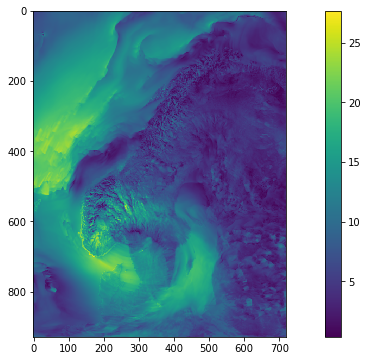

In [6]:
wind_gust_v = nc.variables['wind_speed_of_gust']
plt.imshow(np.flipud(wind_gust_v[t_index, :, :]))
plt.colorbar()

### Wind speed x and y components

In [7]:
wind_x_v = nc.variables['x_wind_10m']
wind_y_v = nc.variables['y_wind_10m']

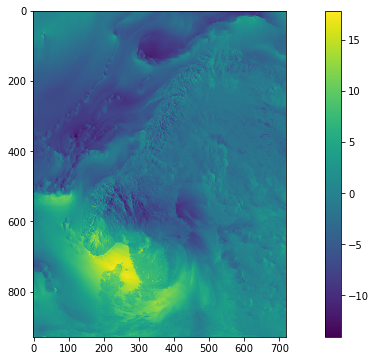

In [8]:
plt.imshow(np.flipud(wind_x_v[t_index, :, :]))
plt.colorbar()

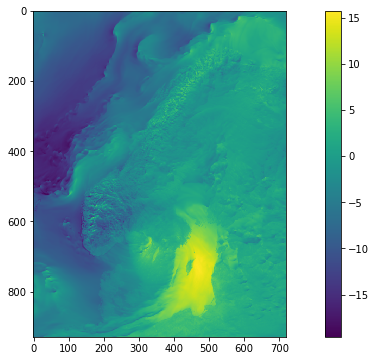

In [9]:
plt.imshow(np.flipud(wind_y_v[t_index, :, :]))
plt.colorbar()

### Wind speed

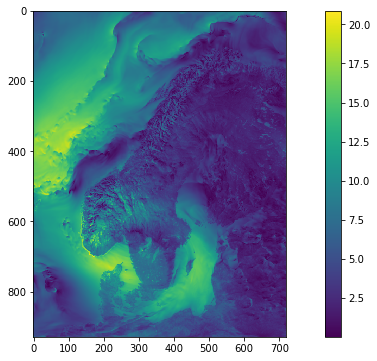

In [10]:
wind_speed = np.sqrt(wind_x_v[t_index, :, :]**2 + wind_y_v[t_index, :, :]**2)
plt.imshow(np.flipud(wind_speed))
plt.colorbar()

### Wind direction

In [11]:
print(ts)

2017-04-24 17:00:00


The calculated vector indicates the direction to where the wind is blowing to, while we want to indicate the direction it is coming from in a wind map.
Therefore we need to __invert__ the *x* and *y* components of the vector before calculating the angle. 

In [12]:
wind_dir = np.degrees(np.arctan2(-wind_x_v[t_index, :, :], -wind_y_v[t_index, :, :]))

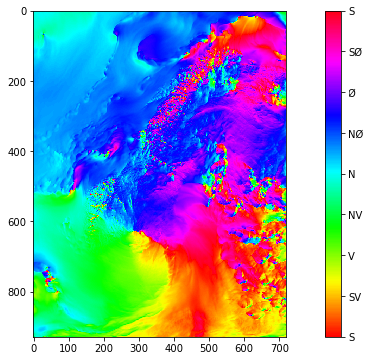

In [13]:
plt.imshow(np.flipud(wind_dir), cmap=plt.cm.hsv, vmin=-180, vmax=180)
cbar = plt.colorbar()
cbar.set_ticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])
cbar.set_ticklabels(['S', 'SV', 'V', 'NV', 'N', 'NØ', 'Ø', 'SØ', 'S'])

### Prepare wind rose for a defined rectangle

In [14]:
x_range = np.arange(300, 400)
y_range = np.arange(600,750)
t_range = np.arange(6,30)

In [15]:
wind_speed = np.sqrt(wind_x_v[t_range, y_range, x_range]**2 + wind_y_v[t_range, y_range, x_range]**2)

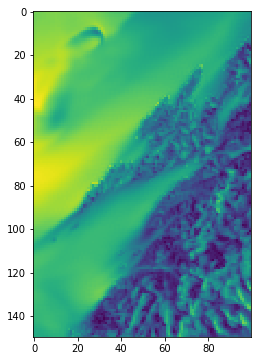

In [16]:
plt.imshow(np.flipud(wind_speed[5,:,:]))

In [17]:
wind_dir = np.degrees(np.arctan2(-wind_x_v[t_range, y_range, x_range], -wind_y_v[t_range, y_range, x_range]))

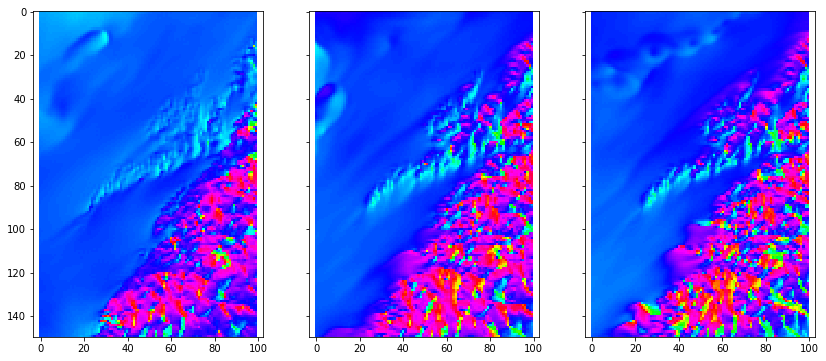

In [18]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
ax1.imshow(np.flipud(wind_dir[5,:,:]), cmap=plt.cm.hsv,vmin=-180, vmax=180)
ax2.imshow(np.flipud(wind_dir[10,:,:]), cmap=plt.cm.hsv,vmin=-180, vmax=180)
ax3.imshow(np.flipud(wind_dir[15,:,:]), cmap=plt.cm.hsv,vmin=-180, vmax=180)

In [19]:
wind_dir_f = wind_dir.flatten()
wind_speed_f = wind_speed.flatten()
print(wind_dir_f.shape, wind_speed_f.shape)
len_wind = len(wind_speed_f)

(360000,) (360000,)


In [20]:
classify_wind(wind_speed_f, wind_dir_f)

[2.938611111111111, 17.496666666666666, 12.957222222222223, 9.354166666666666, 0.8155555555555555, 1.2172222222222222, 0.6327777777777778, 0.9511111111111111]
[0.8736111111111111, 48.329166666666666, 2.1519444444444447, 1.5908333333333333, 0.043611111111111114, 0.017777777777777778, 0.0, 0.0005555555555555556]
[0.0, 0.018055555555555554, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


'var light_winds = [2.938611111111111, 17.496666666666666, 12.957222222222223, 9.354166666666666, 0.8155555555555555, 1.2172222222222222, 0.6327777777777778, 0.9511111111111111];\nvar breeze = [0.8736111111111111, 48.329166666666666, 2.1519444444444447, 1.5908333333333333, 0.043611111111111114, 0.017777777777777778, 0.0, 0.0005555555555555556];\nvar gale = [0.0, 0.018055555555555554, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];\nvar storm = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];\nvar hurricane = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];'

In [21]:
from windrose import WindroseAxes

In [22]:
# convert wind direction to range 0-360
wind_dir_f[np.where((wind_dir_f<0.0))] = wind_dir_f[np.where((wind_dir_f<0.0))] + 360.0

C:\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


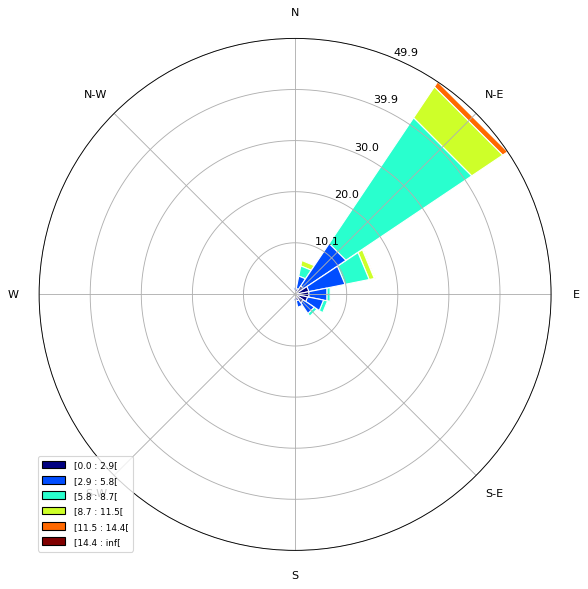

In [23]:
ax = WindroseAxes.from_ax()
ax.bar(wind_dir_f, wind_speed_f, normed=True, opening=0.99, edgecolor='white')
ax.set_legend()

## Analysis over a 24h period

In [24]:
t_start = 6
t_stop = 30

t1 = netCDF4.num2date(time_v[t_start], time_v.units)
t2 = netCDF4.num2date(time_v[t_stop], time_v.units)
t_info = "Period: {0} - {1}".format(t1, t2)

wind_speed = np.sqrt(wind_x_v[t_start:t_stop, :, :]**2 + wind_y_v[t_start:t_stop, :, :]**2)
wind_dir = np.degrees(np.arctan2(-wind_x_v[t_start:t_stop, :, :], -wind_y_v[t_start:t_stop, :, :]))

In [25]:
wind_dir_f = wind_dir.flatten()
wind_speed_f = wind_speed.flatten()
print(wind_dir_f.shape, wind_speed_f.shape)

(16030824,) (16030824,)


In [26]:
wind_dir_f[np.where((wind_dir_f<0.0))] = wind_dir_f[np.where((wind_dir_f<0.0))] + 360.0

C:\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


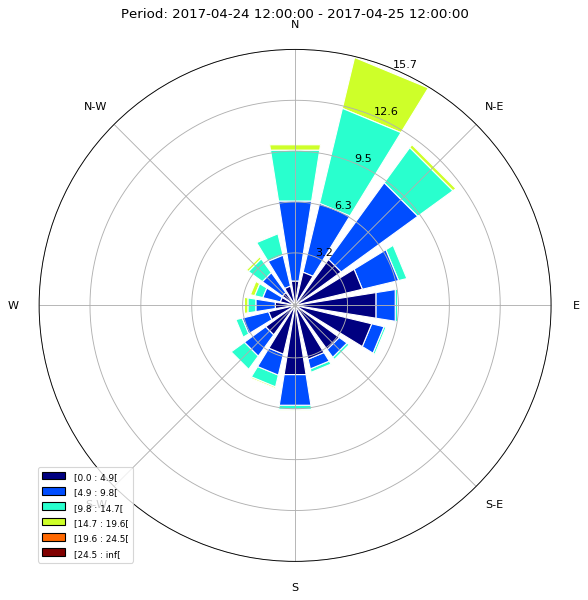

In [27]:
ax = WindroseAxes.from_ax()
ax.bar(wind_dir_f, wind_speed_f, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.set_title(t_info)

## Using wind data on xgeo-grid

Possible issues: 

 - I do not have to use the flipud function for the xgeo-gridded data. Does that influence the wind direction, i.e. is the y-vector in the opposite direction between the two data sets???


In [28]:
# Load region mask
vr = netCDF4.Dataset(r"../data/terrain_parameters/VarslingsOmr_2017.nc", "r")

regions = vr.variables["VarslingsOmr_2017"][:]

ID = 3014 # Lofoten & Vesterålen
region_mask = np.where(regions==ID)
# get the lower left and upper right corner of a rectangle around the region
y_min, y_max, x_min, x_max = min(region_mask[0].flatten()), max(region_mask[0].flatten()), min(region_mask[1].flatten()), max(region_mask[1].flatten())

In [29]:
nc = netCDF4.Dataset(r"Y:\metdata\prognosis\arome\wind\netcdf\2017\arome2_5_wind_850_NVE_00_2017_04_23.nc", "r")
time_v = nc.variables['time']

wind_x_v = nc.variables['x_wind_850hpa']
wind_y_v = nc.variables['y_wind_850hpa']

In [30]:
x1, x2 = x_min, x_max # possible to add a buffer of step_x
y1, y2 = y_min, y_max # possible to add a buffer of step_y

print("Time period: {0} - {1}".format(netCDF4.num2date(time_v[0], time_v.units), netCDF4.num2date(time_v[23], time_v.units)))

wind_x = wind_x_v[0:24, y1:y2, x1:x2]
wind_y = wind_y_v[0:24, y1:y2, x1:x2]
print(wind_x.shape)

region_mask = regions[y1:y2, x1:x2] # redefine region_mask, now clipped to area of interest

wind_x_ma = np.ma.asarray(wind_x)
wind_y_ma = np.ma.asarray(wind_y)
for i in range(wind_x.shape[0]): 
    wind_x_ma[i, :, :] = np.ma.masked_where(region_mask!=ID, wind_x[i, :, :], copy=False)
    #print(type(wind_x[i, :, :]))
    wind_y_ma[i, :, :] = np.ma.masked_where(region_mask!=ID, wind_y[i, :, :], copy=False)

Time period: 2017-04-23 07:00:00 - 2017-04-24 06:00:00
(24, 219, 199)


**ToDo:** split data in gridcells that are above and below treeline - use an fixed treeline elvation or the vegetation mask for each cell.

In [31]:
wind_speed = np.sqrt(wind_x_ma**2 + wind_y_ma**2)
wind_dir = np.degrees(np.arctan2(-wind_x_ma, -wind_y_ma)) # check if the minus is still applicable when using the xgeo-gridded data.
print(type(wind_speed))
wind_dir_f = wind_dir.flatten()
wind_speed_f = wind_speed.flatten()
print(wind_dir_f.shape, wind_speed_f.shape)

wind_dir_f[np.where((wind_dir_f<0.0))] = wind_dir_f[np.where((wind_dir_f<0.0))] + 360.0

<class 'numpy.ma.core.MaskedArray'>
(1045944,) (1045944,)


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


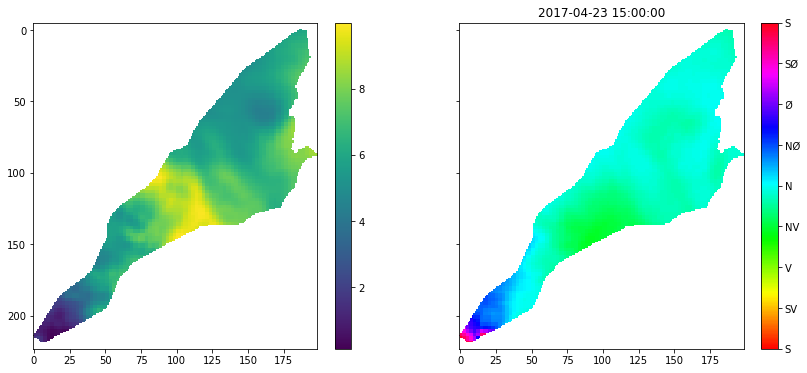

In [32]:
# Choose a time-step
t_index = 8
ts = netCDF4.num2date(time_v[t_index], time_v.units)

f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
plt_spd = ax1.imshow(wind_speed[t_index,:,:], aspect='equal')
plt_dir = ax2.imshow(wind_dir[t_index,:,:], cmap=plt.cm.hsv,vmin=-180, vmax=180)
plt.colorbar(ax=ax1, mappable=plt_spd)
cbar_dir = plt.colorbar(ax=ax2, mappable=plt_dir)

cbar_dir.set_ticks([-180, -135, -90, -45, 0, 45, 90, 135, 180])
cbar_dir.set_ticklabels(['S', 'SV', 'V', 'NV', 'N', 'NØ', 'Ø', 'SØ', 'S'])
plt.title(ts)
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


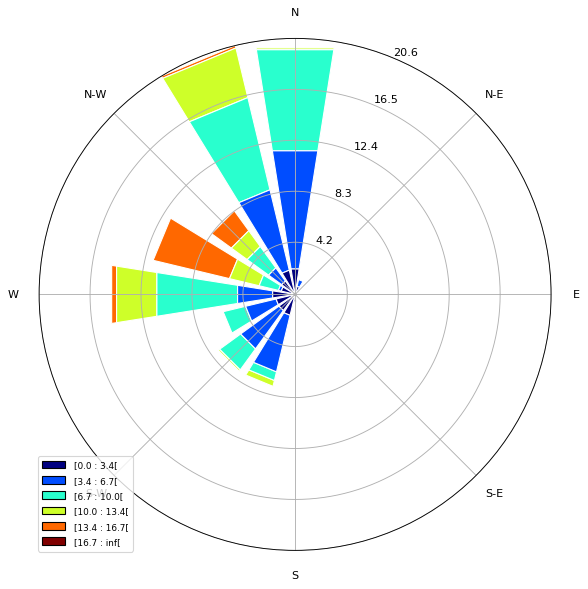

In [33]:
ax = WindroseAxes.from_ax()
ax.bar(wind_dir_f, wind_speed_f, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

**ToDo:** Compare wind speeds for 10m and 850hpa - 850hpa might be too high to use as a basis!

**NEXT**

Define criteria for which wind speed and direction to choose for the regional weather.

- Lower threshold for wind speeds of concern
- Threshold in % when to consider only one wind direction
- Which directions to include if several wind directions could be relevant?

## Comparing different pressure levels from AROME-MetCoOp

In [61]:
#nc_url = "http://thredds.met.no/thredds/dodsC/arome25/arome_metcoop_test2_5km_latest.nc"
nc_url = "http://thredds.met.no/thredds/dodsC/arome25/arome_metcoop_test2_5km_20170423_06.nc"
nc = netCDF4.Dataset(nc_url, 'r')

In [62]:
time_v = nc.variables['time']
pressure_v = nc.variables['pressure']
wind_x_v = nc.variables['x_wind_pl']
wind_y_v = nc.variables['y_wind_pl']

# Choose a time-period and spatial extent
x_range = np.arange(300, 400)
y_range = np.arange(600,750)
t_range = np.arange(6,30)
# Choose a pressure level (if applicable)
p_index = [12,11,10,7] # 12=1000hPa, 11=925hPa, 10=850hPa, ..., 7=500hPa, ..., 0=50hPa in arome_metcoop_test

(360000,) (360000,)
(360000,) (360000,)
(360000,) (360000,)
(360000,) (360000,)


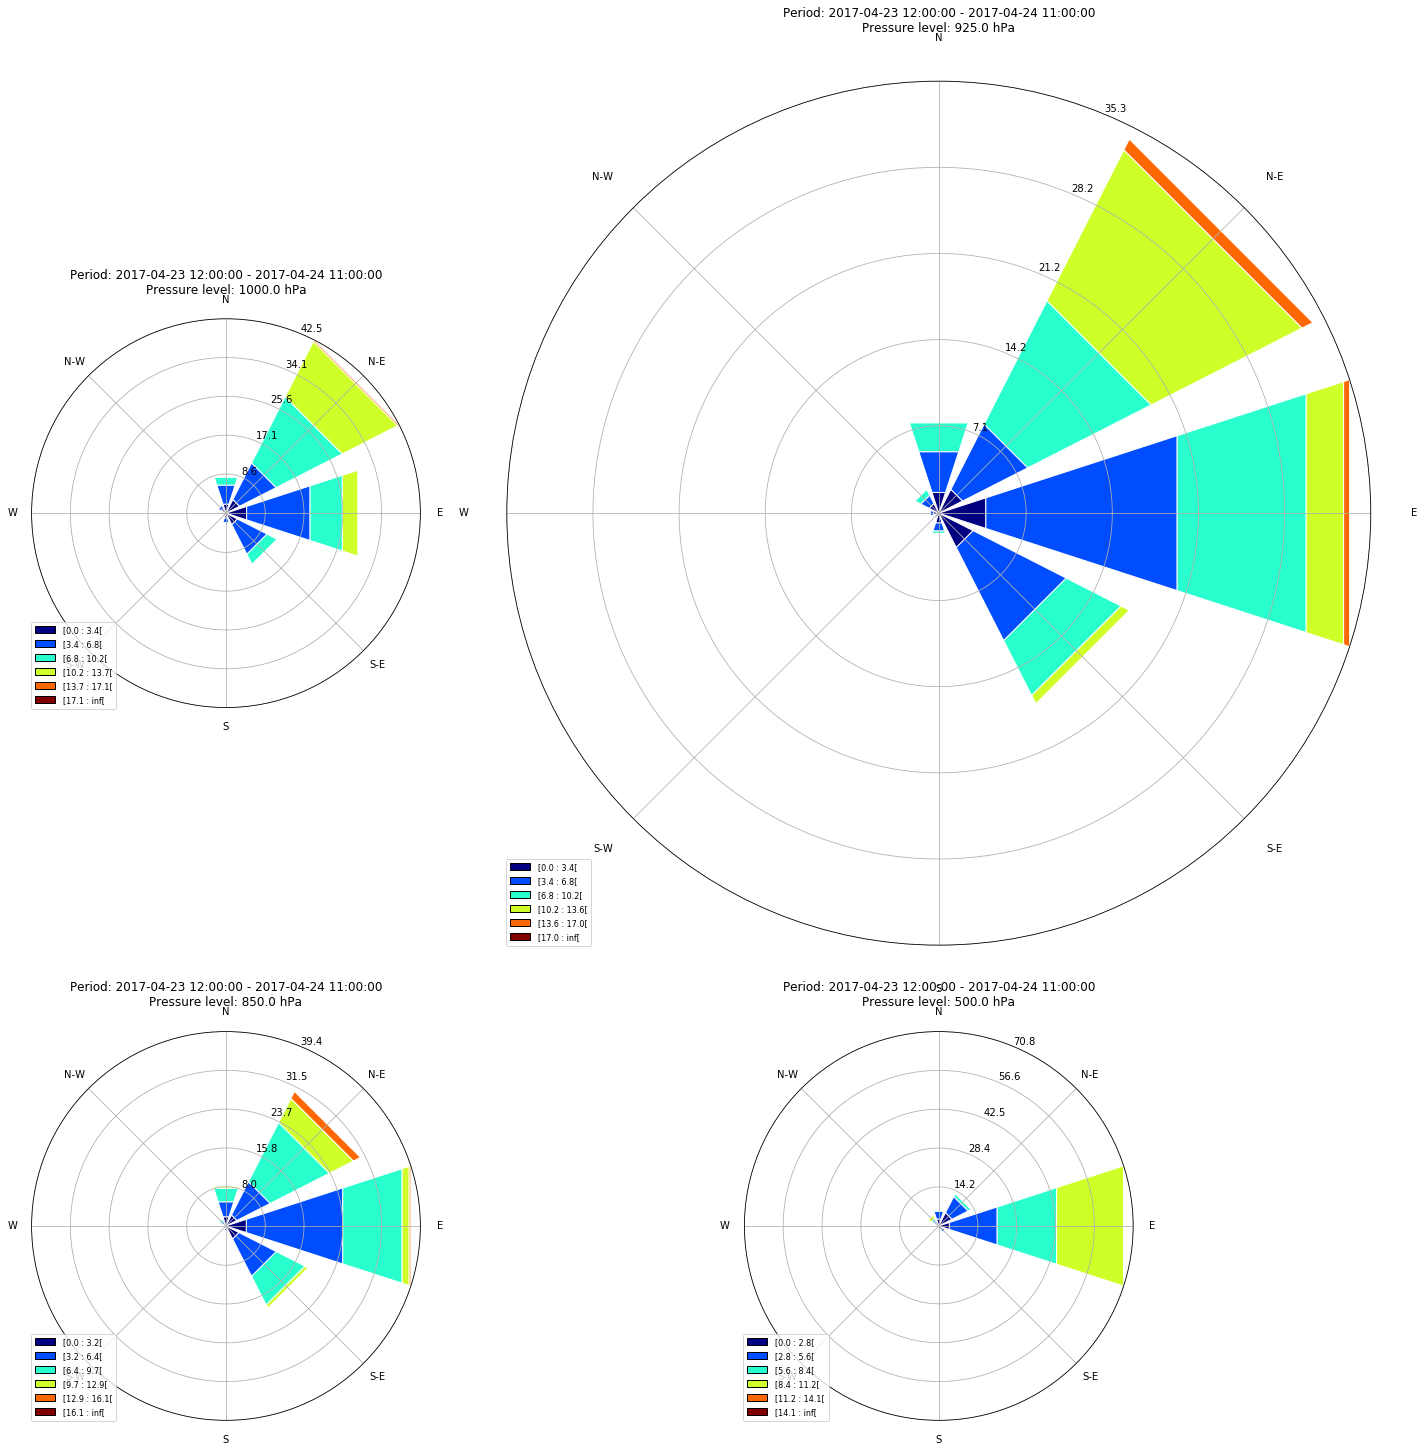

In [71]:
t1 = netCDF4.num2date(time_v[t_range[0]], time_v.units)
t2 = netCDF4.num2date(time_v[t_range[-1]], time_v.units)

wind_speed = np.sqrt(wind_x_v[t_range, p_index, y_range, x_range]**2 + wind_y_v[t_range, p_index, y_range, x_range]**2)
wind_dir = np.degrees(np.arctan2(-wind_x_v[t_range, p_index, y_range, x_range], -wind_y_v[t_range, p_index, y_range, x_range]))

#f, axarr = plt.subplots(2, 2)
f = plt.figure(figsize=(12, 12))
rect = [[0, 0.55, 0.45, 1], [0.55, 0.55, 1, 1], [0, 0, 0.45, 0.45], [0.55, 0, 1, 0.45]]
i = 0
for pl in p_index: #p_index must be of length 4 at max
    
    # Flatten arrays
    wind_dir_f = wind_dir[:, i, :, :].flatten()
    wind_speed_f = wind_speed[:, i, :, :].flatten()
    print(wind_dir_f.shape, wind_speed_f.shape)
    # convert wind direction to range 0-360
    wind_dir_f[np.where((wind_dir_f<0.0))] = wind_dir_f[np.where((wind_dir_f<0.0))] + 360.0
    
    t_info = "Period: {0} - {1}\nPressure level: {2} hPa".format(t1, t2, pressure_v[pl])
    
    # set up plot

    ax = WindroseAxes(f, rect[i])
    ax.bar(wind_dir_f, wind_speed_f, normed=True, opening=0.8, edgecolor='white', nsector=8)
    ax.set_legend()
    ax.set_title(t_info)
    f.add_axes(ax)
    
    i+=1

**TODO:** Would be nice to get the plots equal in size.